# Car Project


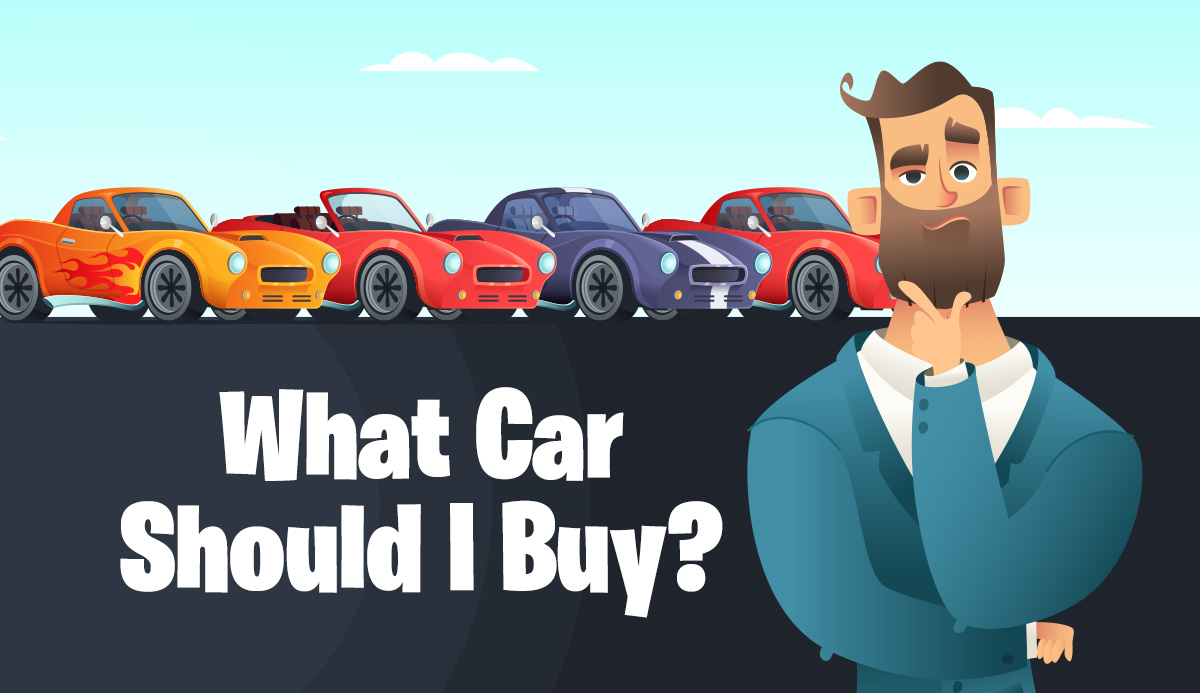

## About Data Set

There are 7 columns in this data set; 

**Features;**

1. Column: **buying**: Buying price of the car (v-high, high, med, low). Examples: low, med, high


2. Column: **maint**: Price of the maintenance of car (v-high, high, med, low). Examples: low, med, high


3. Column: **doors**: Number of doors (2, 3, 4, 5-more). Examples: 2, 3, 4


4. Column: **persons**: Capacity in terms of persons to carry (2, 4, more). Examples: 2, 4, more


5. Column: **lug_boot**: The size of luggage boot (small, med, big). Examples: small, med, big


6. Column: **safety**: Estimated safety of the car (low, med, high). Examples: low, med, high


**Target:**

7. Column: **class**: Car acceptability (unacc: unacceptible, acc: acceptible, good: good,   v-good: very good). Examples: unacc, acc, good






# Import Libraries

In [417]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"]=(10,6) # butun NB boyunca gorseller ayni boyutta olmasi icin

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore") # verilen uyarilan goz ardi edilmesi icin
warnings.warn("this will not show")

# Import Data Set

In [418]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', "class"]# We write coumn names here

df = pd.read_csv("car_acceptability.txt", names=column_names) # We read data and put column  names at the first row. 
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,?,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,?,unacc
...,...,...,...,...,...,...,...
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


* As you can see here, there are ?s in the last row, so we should delete this row.

# EDA 

## Drop the Last Row

In [419]:
df=df.drop(1728)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,?,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,?,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


* As you can see we dropped the last row.

## Shape

In [420]:
df.shape

(1728, 7)

* Data set includes 1728 rows and 7 columns.

## Info

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1727 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [422]:
df.sample(20)

,buying,maint,doors,persons,lug_boot,safety,class
224,vhigh,med,2,2,big,high,unacc
1663,low,low,3,4,big,med,good
1660,low,low,3,4,med,med,acc
711,high,med,4,4,small,low,unacc
508,high,vhigh,4,more,med,med,unacc
1239,med,low,3,more,big,low,unacc
1417,low,high,2,4,med,med,acc
850,high,low,5more,4,med,med,acc
932,med,vhigh,4,4,med,high,acc
17,vhigh,vhigh,2,4,big,high,unacc


* Although it appears that there are only two columns with one Null value, it is also seen that there are values entered as "?", "-", "*" in columns. 

## Unique Values

In [423]:
# For detailed information about the dataset;

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,buying,7,"[vhigh, ?, high, med, nan, low, -, düsük]",object
1,maint,5,"[vhigh, ?, high, med, low]",object
2,doors,9,"[2, 3, 4, ?, 5more, -, 44, iki, 5+]",object
3,persons,4,"[2, ?, 4, more]",object
4,lug_boot,4,"[small, med, big, ?]",object
5,safety,6,"[low, med, high, ?, nan, -, *]",object
6,class,5,"[unacc, ?, acc, vgood, good]",object


## Change "?", "-" and "*" to "NaN"
We want to change the inputs as "?" to "Nan" by using NumPy.

In [424]:
df.replace('?', np.nan, inplace=True)  # ? --> NaN
df.replace('-', np.nan, inplace=True)  # - --> NaN
df.replace('*', np.nan, inplace=True)  # * --> NaN

In [425]:
# Let's use the above function again;
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,buying,5,"[vhigh, nan, high, med, low, düsük]",object
1,maint,4,"[vhigh, nan, high, med, low]",object
2,doors,7,"[2, 3, 4, nan, 5more, 44, iki, 5+]",object
3,persons,3,"[2, nan, 4, more]",object
4,lug_boot,3,"[small, med, big, nan]",object
5,safety,3,"[low, med, high, nan]",object
6,class,4,"[unacc, nan, acc, vgood, good]",object


* As can be seen, there are none but "nan" values in the data set.  

## Change "düsük" to "low" 

Change "dusuk" to "low" in the "buying column 

In [426]:
df.replace('düsük', "low", inplace=True)  # "dusuk"?" --> "low"

In [427]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,buying,4,"[vhigh, nan, high, med, low]",object
1,maint,4,"[vhigh, nan, high, med, low]",object
2,doors,7,"[2, 3, 4, nan, 5more, 44, iki, 5+]",object
3,persons,3,"[2, nan, 4, more]",object
4,lug_boot,3,"[small, med, big, nan]",object
5,safety,3,"[low, med, high, nan]",object
6,class,4,"[unacc, nan, acc, vgood, good]",object


## Change "44" to "4"; "iki" to 2: "5more" and "5+" to "5"

* There isn't a 44-door car. Therefore, we think that 44 was entered incorrectly here and we decided to make it 4.   

* Since cars have up to 5 doors, we decided to change "5+" and "5more" to 5. 

* These were also converted because there was a difference in the spelling of 2, 3 and 4.

In [428]:
df["doors"].replace("44", 4, inplace=True)  # "44" --> 4
df["doors"].replace("iki", 2, inplace=True)  # "iki" --> 2
df["doors"].replace("2", 2, inplace=True)  # "2" --> 2
df["doors"].replace("3", 3, inplace=True)  # "3" --> 3
df["doors"].replace("4", 4, inplace=True)  # "4" --> 4
df["doors"].replace("5more", 5, inplace=True)  # "5more" --> 5
df["doors"].replace("5+", 5, inplace=True)  # "5+" --> 5

In [16]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,buying,4,"[vhigh, nan, high, med, low]",object
1,maint,4,"[vhigh, nan, high, med, low]",object
2,doors,4,"[2.0, 3.0, 4.0, nan, 5.0]",float64
3,persons,3,"[2, nan, 4, more]",object
4,lug_boot,3,"[small, med, big, nan]",object
5,safety,3,"[low, med, high, nan]",object
6,class,4,"[unacc, nan, acc, vgood, good]",object


## Null Check

In [429]:
# Let's check the null vaules;

df.isna().sum()

buying      4
maint       3
doors       3
persons     2
lug_boot    1
safety      5
class       1
dtype: int64

* There are null values in the data set. We should fill (hanlde) them.  

## Simple Imputer

Since the data are categorical, it makes sense to fill None values with mode (frequency). 

If the data were categorical, the average of the numerical values around the None value of interest could be used using the KNN Imputer.  

In [430]:
from sklearn.impute import SimpleImputer # import library

simple_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # assign a object

for col in df.columns:
    simple_imp.fit(df[[col]]) # fit the imputer

    df[[col]] = simple_imp.fit_transform(df[[col]]) # fill the "buying" column

In [57]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [431]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,buying,4,"[vhigh, high, med, low]",object
1,maint,4,"[vhigh, high, med, low]",object
2,doors,4,"[2.0, 3.0, 4.0, 5.0]",float64
3,persons,3,"[2, 4, more]",object
4,lug_boot,3,"[small, med, big]",object
5,safety,3,"[low, med, high]",object
6,class,4,"[unacc, acc, vgood, good]",object


**Note:** There insn't any null value in the data set. Data set includes "object" values except "doors" column.  

In [432]:
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2.0,2,small,low,unacc
1,vhigh,vhigh,2.0,2,small,med,unacc
2,vhigh,vhigh,2.0,4,small,high,unacc


## Is Data Balanced?

In [433]:
df["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

**Comment:** We have unbalanced data. 

## Let's Combine the Two Categories

Since there are few cars of the "good" and "vgood" types, the model cannot learn from them.

In [434]:
#df["class"].replace("vgood", "good", inplace=True)

df["class"].replace("vgood", "acc", inplace=True)
df["class"].replace("good", "acc", inplace=True)

In [61]:
df["class"].value_counts()

unacc    1210
acc       518
Name: class, dtype: int64

**Comment:** Now at least the model can learn something from the "good" category. 

In [435]:
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2.0,2,small,low,unacc
1,vhigh,vhigh,2.0,2,small,med,unacc
2,vhigh,vhigh,2.0,4,small,high,unacc


## Copy Data

Let's copy the correct version of the data set; 

In [436]:
df1 = df.copy()

In [438]:
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2.0,2,small,low,unacc
1,vhigh,vhigh,2.0,2,small,med,unacc
2,vhigh,vhigh,2.0,4,small,high,unacc


## Export the Data Set

In [439]:
# Let's export the correct version of the data set;

df.to_csv("df_last.csv", index = False)


In [440]:
# Let's reread the data we just exported; 
df = pd.read_csv("df_last.csv")
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2.0,2,small,low,unacc
1,vhigh,vhigh,2.0,2,small,med,unacc
2,vhigh,vhigh,2.0,4,small,high,unacc


## Descriptive Statistics

In [25]:
df.describe().T # For numeric columns

,count,mean,std,min,25%,50%,75%,max
doors,1728.0,3.498843,1.117321,2.0,3.0,3.0,4.0,5.0


In [84]:
df.describe(include=['object']) # For categoricial columns

,buying,maint,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728
unique,4,4,3,3,3,3
top,high,high,4,big,high,unacc
freq,436,435,578,577,581,1210


# Data Visulation

## Count Plot

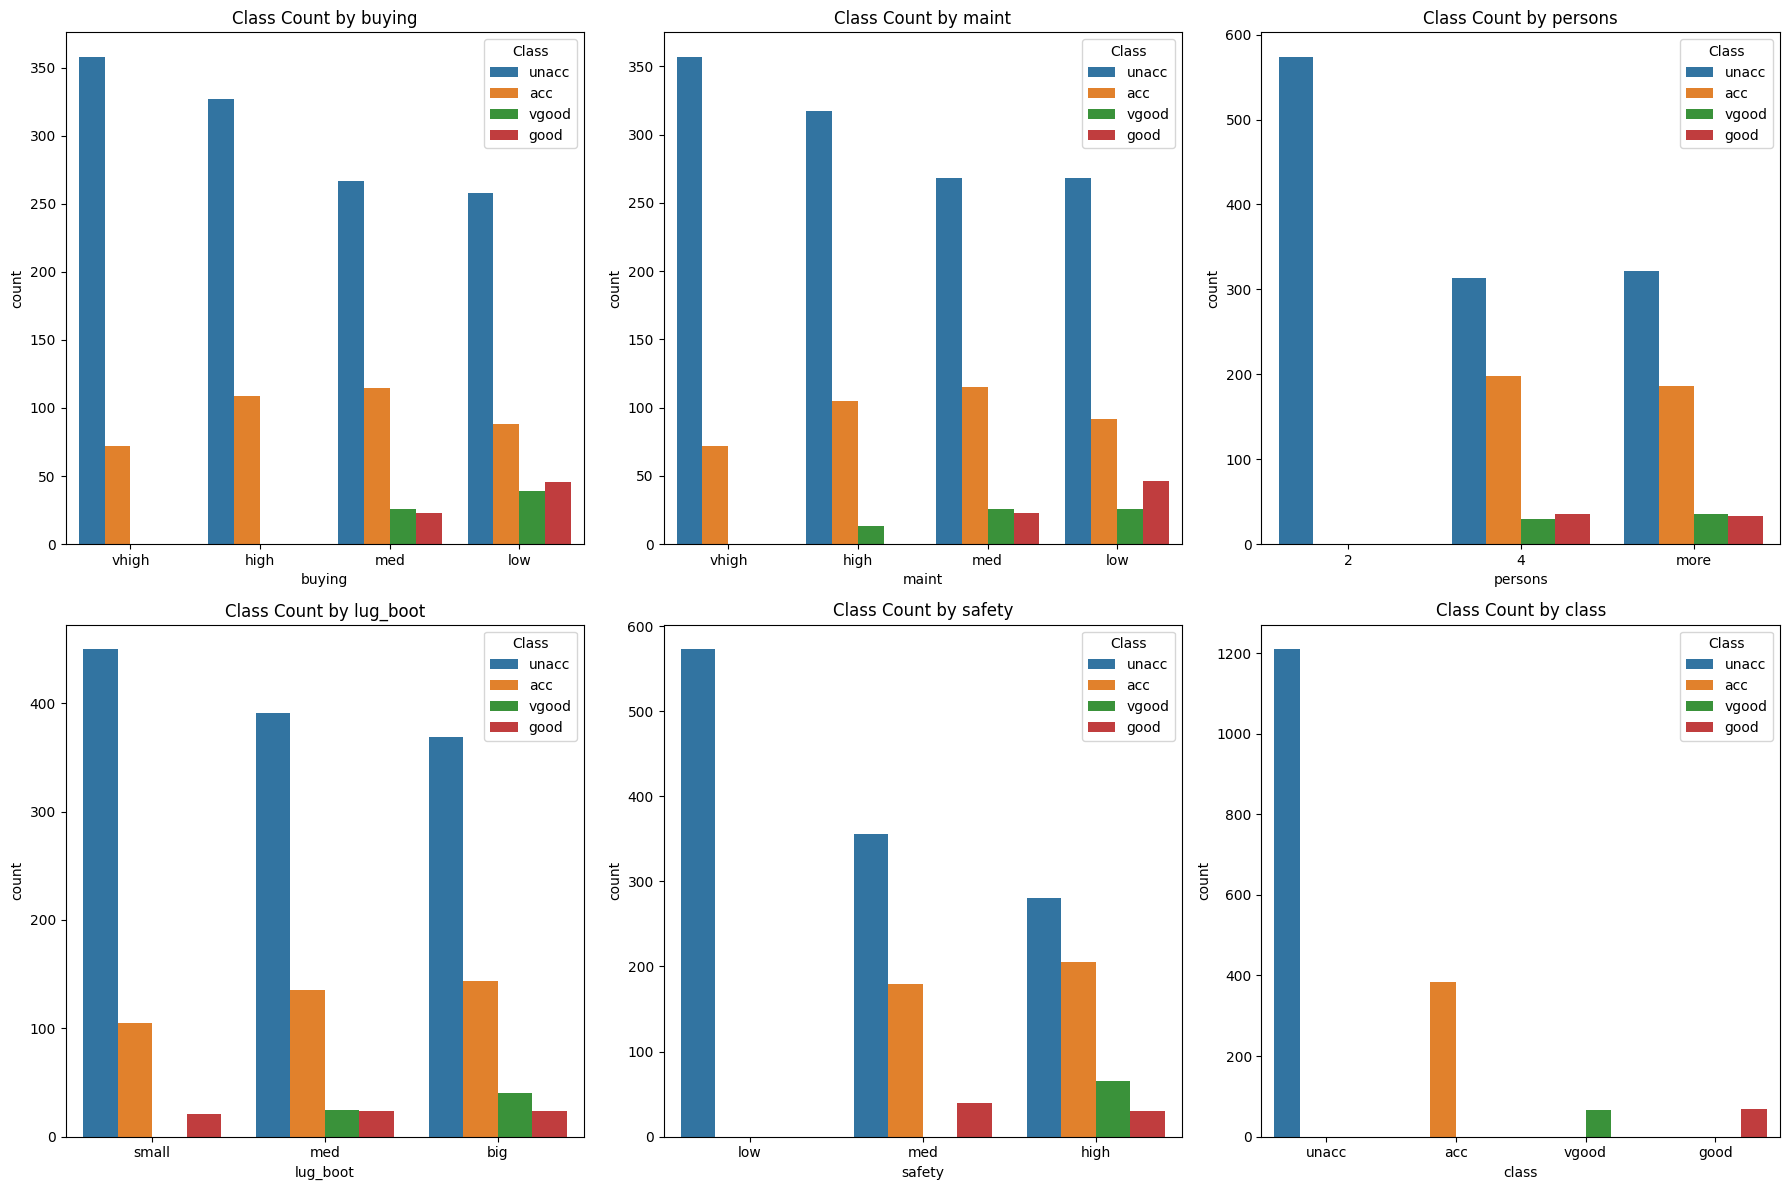

In [58]:
# Countplots for categorical features;

features = ['buying', 'maint', 'persons', 'lug_boot', 'safety', 'class']

num_rows = (len(features) + 2) // 3
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows))
for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    sns.countplot(data=df, x=feature, hue='class', ax=axes[row, col])
    axes[row, col].set_title(f'Class Count by {feature}')
    axes[row, col].legend(title='Class', loc='upper right')

# Boş olan subplotları gizle
for i in range(len(features), num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

**Comment:** The majority of the cars in this dataset are not available for purchase ("unacc").  

# Machine Learning Algoritms

## Labelling

In [26]:
X, y =df.drop(["class"], axis = 1), df["class"]

## Split Train & Test

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y
                                                    )

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

* There are 1382 rows oin train and 346 rows in test data.

## CatBoost

Since the data used in the study is categorical, it would be logical to perform the classification analysis with CatBoost. 

CatBost can work with data without encoding and scaling operations. 

In [170]:
from catboost import CatBoostClassifier, Pool

### Select the Catrgoricial Features

In [171]:
# Since we need to provide a list of categorical variables in CatBoost, we do this here;
categoricial_features = list(X_train.select_dtypes(include = "object").columns)
categoricial_features

[]

### Pooling the Data Set

In [172]:
# Pool the data: We pooled the data to make the computer run faster by sending the data to RAM piece by piece; 

train_pool = Pool(X_train, y_train, cat_features = categoricial_features)
test_pool = Pool(X_test, y_test, cat_features = categoricial_features)


### Random Search

In [173]:
# Let's set up the model by Rondom Search;

cat_model = CatBoostClassifier(n_estimators = 300)

In [174]:
param_dist = {"learning_rate": [0.03, 0.1, 0.3],
             "depth": [3, 5, 7],
             "l2_leaf_reg": [1, 3, 5]}

In [175]:
# Let's set up the model by Rondom Search;

cat_model = CatBoostClassifier(iterations=100, loss_function='Logloss')

search_results = cat_model.randomized_search(
                                            param_dist,
                                            train_pool,
                                            cv=5,
                                            n_iter=5,
                                            partition_random_seed=42,
                                            verbose=1
                                            )

# Show the results;
search_results

0:	learn: 0.6472513	test: 0.6466459	best: 0.6466459 (0)	total: 164ms	remaining: 16.2s
1:	learn: 0.6060860	test: 0.6037090	best: 0.6037090 (1)	total: 167ms	remaining: 8.2s
2:	learn: 0.5694480	test: 0.5666995	best: 0.5666995 (2)	total: 170ms	remaining: 5.5s
3:	learn: 0.5361997	test: 0.5332861	best: 0.5332861 (3)	total: 173ms	remaining: 4.14s
4:	learn: 0.5063992	test: 0.5034315	best: 0.5034315 (4)	total: 175ms	remaining: 3.33s
5:	learn: 0.4805973	test: 0.4764372	best: 0.4764372 (5)	total: 178ms	remaining: 2.79s
6:	learn: 0.4569501	test: 0.4523446	best: 0.4523446 (6)	total: 181ms	remaining: 2.4s
7:	learn: 0.4363460	test: 0.4308624	best: 0.4308624 (7)	total: 183ms	remaining: 2.11s
8:	learn: 0.4173798	test: 0.4116830	best: 0.4116830 (8)	total: 186ms	remaining: 1.88s
9:	learn: 0.4004391	test: 0.3946111	best: 0.3946111 (9)	total: 188ms	remaining: 1.7s
10:	learn: 0.3845936	test: 0.3792933	best: 0.3792933 (10)	total: 191ms	remaining: 1.54s
11:	learn: 0.3755975	test: 0.3704619	best: 0.3704619 (11

29:	learn: 0.1373536	test: 0.1364058	best: 0.1364058 (29)	total: 178ms	remaining: 415ms
30:	learn: 0.1337343	test: 0.1337909	best: 0.1337909 (30)	total: 179ms	remaining: 399ms
31:	learn: 0.1309044	test: 0.1318181	best: 0.1318181 (31)	total: 180ms	remaining: 383ms
32:	learn: 0.1285338	test: 0.1297632	best: 0.1297632 (32)	total: 181ms	remaining: 368ms
33:	learn: 0.1266454	test: 0.1281111	best: 0.1281111 (33)	total: 183ms	remaining: 354ms
34:	learn: 0.1255495	test: 0.1272156	best: 0.1272156 (34)	total: 184ms	remaining: 342ms
35:	learn: 0.1227016	test: 0.1215406	best: 0.1215406 (35)	total: 185ms	remaining: 329ms
36:	learn: 0.1214760	test: 0.1204621	best: 0.1204621 (36)	total: 187ms	remaining: 318ms
37:	learn: 0.1195490	test: 0.1189962	best: 0.1189962 (37)	total: 188ms	remaining: 307ms
38:	learn: 0.1182340	test: 0.1181032	best: 0.1181032 (38)	total: 189ms	remaining: 296ms
39:	learn: 0.1172892	test: 0.1172662	best: 0.1172662 (39)	total: 190ms	remaining: 285ms
40:	learn: 0.1156521	test: 0.116

22:	learn: 0.0855282	test: 0.0908683	best: 0.0908683 (22)	total: 162ms	remaining: 543ms
23:	learn: 0.0833451	test: 0.0890984	best: 0.0890984 (23)	total: 164ms	remaining: 519ms
24:	learn: 0.0798639	test: 0.0836013	best: 0.0836013 (24)	total: 165ms	remaining: 496ms
25:	learn: 0.0775907	test: 0.0818719	best: 0.0818719 (25)	total: 167ms	remaining: 475ms
26:	learn: 0.0745432	test: 0.0793164	best: 0.0793164 (26)	total: 169ms	remaining: 456ms
27:	learn: 0.0728613	test: 0.0785139	best: 0.0785139 (27)	total: 170ms	remaining: 438ms
28:	learn: 0.0698938	test: 0.0759767	best: 0.0759767 (28)	total: 172ms	remaining: 421ms
29:	learn: 0.0669092	test: 0.0741162	best: 0.0741162 (29)	total: 174ms	remaining: 406ms
30:	learn: 0.0644976	test: 0.0693450	best: 0.0693450 (30)	total: 175ms	remaining: 391ms
31:	learn: 0.0627010	test: 0.0676720	best: 0.0676720 (31)	total: 177ms	remaining: 376ms
32:	learn: 0.0614746	test: 0.0660737	best: 0.0660737 (32)	total: 178ms	remaining: 362ms
33:	learn: 0.0597941	test: 0.062

20:	learn: 0.2598251	test: 0.2603872	best: 0.2603872 (20)	total: 113ms	remaining: 423ms
21:	learn: 0.2529238	test: 0.2536055	best: 0.2536055 (21)	total: 114ms	remaining: 406ms
22:	learn: 0.2456587	test: 0.2448120	best: 0.2448120 (22)	total: 116ms	remaining: 389ms
23:	learn: 0.2398266	test: 0.2386432	best: 0.2386432 (23)	total: 118ms	remaining: 372ms
24:	learn: 0.2340416	test: 0.2337564	best: 0.2337564 (24)	total: 119ms	remaining: 357ms
25:	learn: 0.2285008	test: 0.2289887	best: 0.2289887 (25)	total: 121ms	remaining: 344ms
26:	learn: 0.2224063	test: 0.2230678	best: 0.2230678 (26)	total: 122ms	remaining: 331ms
27:	learn: 0.2177929	test: 0.2175119	best: 0.2175119 (27)	total: 124ms	remaining: 318ms
28:	learn: 0.2124528	test: 0.2120208	best: 0.2120208 (28)	total: 125ms	remaining: 307ms
29:	learn: 0.2074926	test: 0.2067953	best: 0.2067953 (29)	total: 127ms	remaining: 297ms
30:	learn: 0.2026817	test: 0.2008578	best: 0.2008578 (30)	total: 129ms	remaining: 287ms
31:	learn: 0.1988287	test: 0.197

38:	learn: 0.0436955	test: 0.0549460	best: 0.0549460 (38)	total: 224ms	remaining: 351ms
39:	learn: 0.0426274	test: 0.0537886	best: 0.0537886 (39)	total: 226ms	remaining: 339ms
40:	learn: 0.0410624	test: 0.0512239	best: 0.0512239 (40)	total: 228ms	remaining: 328ms
41:	learn: 0.0394827	test: 0.0492701	best: 0.0492701 (41)	total: 230ms	remaining: 317ms
42:	learn: 0.0382396	test: 0.0477234	best: 0.0477234 (42)	total: 231ms	remaining: 307ms
43:	learn: 0.0370435	test: 0.0469999	best: 0.0469999 (43)	total: 233ms	remaining: 297ms
44:	learn: 0.0362750	test: 0.0459430	best: 0.0459430 (44)	total: 235ms	remaining: 287ms
45:	learn: 0.0351497	test: 0.0452753	best: 0.0452753 (45)	total: 237ms	remaining: 278ms
46:	learn: 0.0340227	test: 0.0440636	best: 0.0440636 (46)	total: 238ms	remaining: 268ms
47:	learn: 0.0332931	test: 0.0431238	best: 0.0431238 (47)	total: 243ms	remaining: 263ms
48:	learn: 0.0324018	test: 0.0427701	best: 0.0427701 (48)	total: 245ms	remaining: 255ms
49:	learn: 0.0314282	test: 0.041

32:	learn: 0.0591798	test: 0.0962103	best: 0.0962103 (32)	total: 225ms	remaining: 457ms
33:	learn: 0.0571336	test: 0.0916601	best: 0.0916601 (33)	total: 227ms	remaining: 440ms
34:	learn: 0.0560993	test: 0.0905177	best: 0.0905177 (34)	total: 228ms	remaining: 424ms
35:	learn: 0.0543100	test: 0.0889605	best: 0.0889605 (35)	total: 230ms	remaining: 409ms
36:	learn: 0.0533237	test: 0.0881661	best: 0.0881661 (36)	total: 232ms	remaining: 394ms
37:	learn: 0.0531621	test: 0.0880616	best: 0.0880616 (37)	total: 233ms	remaining: 380ms
38:	learn: 0.0515341	test: 0.0875316	best: 0.0875316 (38)	total: 234ms	remaining: 367ms
39:	learn: 0.0503350	test: 0.0862514	best: 0.0862514 (39)	total: 236ms	remaining: 354ms
40:	learn: 0.0484598	test: 0.0825882	best: 0.0825882 (40)	total: 238ms	remaining: 342ms
41:	learn: 0.0476309	test: 0.0807765	best: 0.0807765 (41)	total: 239ms	remaining: 330ms
42:	learn: 0.0457156	test: 0.0781966	best: 0.0781966 (42)	total: 240ms	remaining: 318ms
43:	learn: 0.0451530	test: 0.077

25:	learn: 0.0808006	test: 0.0850760	best: 0.0850760 (25)	total: 123ms	remaining: 351ms
26:	learn: 0.0774172	test: 0.0812116	best: 0.0812116 (26)	total: 124ms	remaining: 336ms
27:	learn: 0.0756354	test: 0.0797703	best: 0.0797703 (27)	total: 125ms	remaining: 322ms
28:	learn: 0.0730556	test: 0.0775534	best: 0.0775534 (28)	total: 127ms	remaining: 311ms
29:	learn: 0.0715519	test: 0.0775403	best: 0.0775403 (29)	total: 128ms	remaining: 300ms
30:	learn: 0.0695558	test: 0.0757124	best: 0.0757124 (30)	total: 130ms	remaining: 289ms
31:	learn: 0.0673604	test: 0.0733221	best: 0.0733221 (31)	total: 132ms	remaining: 280ms
32:	learn: 0.0646371	test: 0.0715465	best: 0.0715465 (32)	total: 133ms	remaining: 270ms
33:	learn: 0.0628969	test: 0.0690012	best: 0.0690012 (33)	total: 135ms	remaining: 261ms
34:	learn: 0.0612075	test: 0.0663389	best: 0.0663389 (34)	total: 136ms	remaining: 252ms
35:	learn: 0.0603522	test: 0.0656030	best: 0.0656030 (35)	total: 137ms	remaining: 244ms
36:	learn: 0.0591762	test: 0.064

21:	learn: 0.0852316	test: 0.0959144	best: 0.0959144 (21)	total: 146ms	remaining: 517ms
22:	learn: 0.0815398	test: 0.0933133	best: 0.0933133 (22)	total: 147ms	remaining: 492ms
23:	learn: 0.0787835	test: 0.0904918	best: 0.0904918 (23)	total: 148ms	remaining: 470ms
24:	learn: 0.0753033	test: 0.0882795	best: 0.0882795 (24)	total: 150ms	remaining: 450ms
25:	learn: 0.0736673	test: 0.0864620	best: 0.0864620 (25)	total: 151ms	remaining: 431ms
26:	learn: 0.0723052	test: 0.0853697	best: 0.0853697 (26)	total: 153ms	remaining: 414ms
27:	learn: 0.0705940	test: 0.0839611	best: 0.0839611 (27)	total: 155ms	remaining: 397ms
28:	learn: 0.0704109	test: 0.0839531	best: 0.0839531 (28)	total: 156ms	remaining: 381ms
29:	learn: 0.0681831	test: 0.0819146	best: 0.0819146 (29)	total: 157ms	remaining: 367ms
30:	learn: 0.0664191	test: 0.0794867	best: 0.0794867 (30)	total: 159ms	remaining: 354ms
31:	learn: 0.0642989	test: 0.0767893	best: 0.0767893 (31)	total: 161ms	remaining: 342ms
32:	learn: 0.0623731	test: 0.075

16:	learn: 0.1077156	test: 0.1034166	best: 0.1034166 (16)	total: 120ms	remaining: 586ms
17:	learn: 0.1034494	test: 0.1002628	best: 0.1002628 (17)	total: 122ms	remaining: 556ms
18:	learn: 0.0979072	test: 0.0954596	best: 0.0954596 (18)	total: 124ms	remaining: 527ms
19:	learn: 0.0941228	test: 0.0935099	best: 0.0935099 (19)	total: 125ms	remaining: 500ms
20:	learn: 0.0883650	test: 0.0891372	best: 0.0891372 (20)	total: 127ms	remaining: 477ms
21:	learn: 0.0848742	test: 0.0868895	best: 0.0868895 (21)	total: 128ms	remaining: 455ms
22:	learn: 0.0829607	test: 0.0846795	best: 0.0846795 (22)	total: 130ms	remaining: 434ms
23:	learn: 0.0807857	test: 0.0828239	best: 0.0828239 (23)	total: 131ms	remaining: 416ms
24:	learn: 0.0786543	test: 0.0805243	best: 0.0805243 (24)	total: 140ms	remaining: 421ms
25:	learn: 0.0759281	test: 0.0783138	best: 0.0783138 (25)	total: 150ms	remaining: 427ms
26:	learn: 0.0735672	test: 0.0753702	best: 0.0753702 (26)	total: 159ms	remaining: 431ms
27:	learn: 0.0715806	test: 0.074

33:	learn: 0.0616301	test: 0.0669152	best: 0.0669152 (33)	total: 171ms	remaining: 332ms
34:	learn: 0.0605738	test: 0.0659290	best: 0.0659290 (34)	total: 172ms	remaining: 319ms
35:	learn: 0.0592153	test: 0.0642998	best: 0.0642998 (35)	total: 173ms	remaining: 307ms
36:	learn: 0.0572755	test: 0.0612374	best: 0.0612374 (36)	total: 174ms	remaining: 296ms
37:	learn: 0.0565837	test: 0.0611613	best: 0.0611613 (37)	total: 176ms	remaining: 286ms
38:	learn: 0.0552013	test: 0.0601986	best: 0.0601986 (38)	total: 177ms	remaining: 277ms
39:	learn: 0.0534500	test: 0.0587081	best: 0.0587081 (39)	total: 179ms	remaining: 268ms
40:	learn: 0.0518641	test: 0.0576243	best: 0.0576243 (40)	total: 180ms	remaining: 259ms
41:	learn: 0.0514321	test: 0.0572072	best: 0.0572072 (41)	total: 182ms	remaining: 251ms
42:	learn: 0.0505285	test: 0.0560200	best: 0.0560200 (42)	total: 183ms	remaining: 243ms
43:	learn: 0.0497646	test: 0.0555867	best: 0.0555867 (43)	total: 185ms	remaining: 235ms
44:	learn: 0.0484658	test: 0.054

{'params': {'depth': 5, 'l2_leaf_reg': 1, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
     

In [176]:
search_results["params"] # Best HYPER params

{'depth': 5, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [177]:
# Get predicts for train;

y_train_pred = cat_model.predict(train_pool)
y_train_pred 

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [180]:
# Get predicts for test;

y_pred = cat_model.predict(test_pool)
y_pred 

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

### Model Evaluation for CatBoost

Let's see  the model scores;

In [181]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import classification_report

In [182]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, digits = 2))

[[959   9]
 [  1 413]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       968
           1       0.98      1.00      0.99       414

    accuracy                           0.99      1382
   macro avg       0.99      0.99      0.99      1382
weighted avg       0.99      0.99      0.99      1382



In [183]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 2))

[[242   0]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       1.00      1.00      1.00       104

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346



**Iterpret:** The "f1-score" of the model in the train data is 0.96 for acceptable (acc) and 0.98 for unaccebtable (unacc). In the test data, the model's f1-score is 1. This means that the model was able to classify the cars in terms of affordability with 100% success. 

The fact that the results are so perfect raises some questions. Therefore, we would like to repeat this analysis with different algorithms.  

The Logistic Regression Model misclassified **0** observations. 

## Logistic Regression

Logistic Regression, which is a classification method even though its name is regression, is a powerful classification algorithm.  

However, in the Logistic Regression model, the data must be in numeric form. 

Encoding operations are used for this purpose. 

### Ordinal Encoding

Since the dataset contains ordinal values such as "small", "medium" and "large", ordinal encoding will be performed. 


In [109]:
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2.0,2,small,low,unacc
1,vhigh,vhigh,2.0,2,small,med,unacc
2,vhigh,vhigh,2.0,4,small,high,unacc


In [102]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,buying,4,"[vhigh, high, med, low]",object
1,maint,4,"[vhigh, high, med, low]",object
2,doors,4,"[2.0, 3.0, 4.0, 5.0]",float64
3,persons,3,"[2, 4, more]",object
4,lug_boot,3,"[small, med, big]",object
5,safety,3,"[low, med, high]",object
6,class,2,"[unacc, acc]",object


In [110]:
from sklearn.preprocessing import OrdinalEncoder
# Encoding for "buying" column;

# Create OrdinalEncoder object;
encoder = OrdinalEncoder(categories=[['low', 'med', 'high', 'vhigh']])

# Convert column "buying" by using ordinal encoding
encoded_values = encoder.fit_transform(df[['buying']])

# Add transformed values to DataFrame
df['buying'] = encoded_values
df['buying']

0       3.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
1723    0.0
1724    0.0
1725    0.0
1726    0.0
1727    0.0
Name: buying, Length: 1728, dtype: float64

In [111]:
# Encoding for "maint" column;

# Create OrdinalEncoder object;
encoder = OrdinalEncoder(categories=[['low', 'med', 'high', 'vhigh']])

# Convert column "buying" by using ordinal encoding
encoded_values = encoder.fit_transform(df[['maint']])

# Add transformed values to DataFrame
df['maint'] = encoded_values
df['maint']

0       3.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
1723    0.0
1724    0.0
1725    0.0
1726    0.0
1727    0.0
Name: maint, Length: 1728, dtype: float64

In [112]:
# Encoding for "lug_boot" column;

# Create OrdinalEncoder object;
encoder = OrdinalEncoder(categories=[['small', 'med', 'big']])

# Convert column "buying" by using ordinal encoding
encoded_values = encoder.fit_transform(df[['lug_boot']])

# Add transformed values to DataFrame
df['lug_boot'] = encoded_values
df['lug_boot']

0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
1723    1.0
1724    1.0
1725    2.0
1726    2.0
1727    2.0
Name: lug_boot, Length: 1728, dtype: float64

In [113]:
# Encoding for "safety" column;

# Create OrdinalEncoder object;
encoder = OrdinalEncoder(categories=[['low', 'med', 'high']])

# Convert column "buying" by using ordinal encoding
encoded_values = encoder.fit_transform(df[['safety']])

# Add transformed values to DataFrame
df['safety'] = encoded_values
df['safety']

0       0.0
1       1.0
2       2.0
3       0.0
4       2.0
       ... 
1723    1.0
1724    2.0
1725    0.0
1726    1.0
1727    2.0
Name: safety, Length: 1728, dtype: float64

In [116]:
# Encoding for "persons" column: There are 2, 4 and "more" values in the "person" column. Here we want to make "more" 6.
# I will use "replace" for this purpose;

df["persons"] = df['persons'].replace("more", 6)
df["persons"]

0       2
1       2
2       4
3       2
4       2
       ..
1723    6
1724    6
1725    6
1726    6
1727    6
Name: persons, Length: 1728, dtype: object

In [117]:
# Finally, let's make the categorical values in the "class" column numeric.
# I will use "map" for this purpose;

df["class"] = df['class'].map({"unacc": 0, "acc": 1})
df["class"] 

0       0
1       0
2       0
3       0
4       0
       ..
1723    1
1724    1
1725    0
1726    1
1727    1
Name: class, Length: 1728, dtype: int64

In [118]:
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,2.0,2,0.0,0.0,0
1,3.0,3.0,2.0,2,0.0,1.0,0
2,3.0,3.0,2.0,4,0.0,2.0,0


* The data set has become completely numeric. 

#### Export the Encoded Data Set

In [120]:
# Let's export the encoded version of the data set;

df.to_csv("df_encoded.csv", index = False)

In [88]:
# Let's reread the data we just exported; 
df = pd.read_csv("df_encoded.csv")
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,2.0,2,0.0,0.0,0
1,3.0,3.0,2.0,2,0.0,1.0,0
2,3.0,3.0,2.0,4,0.0,2.0,0


#### Labelling & Train - Test Split

In [89]:
X, y =df.drop(["class"], axis = 1), df["class"]

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [91]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
430,3.0,0.0,5.0,6,2.0,1.0
1308,0.0,3.0,2.0,4,1.0,0.0
1502,0.0,2.0,5.0,4,2.0,2.0
395,3.0,0.0,4.0,4,2.0,2.0
909,1.0,3.0,3.0,6,0.0,0.0


In [92]:
y_train.head()

430     1
1308    0
1502    1
395     1
909     0
Name: class, dtype: int64

### Logistic Regression Model with Random Search

In [163]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [156]:
# Assign the LogisticRegression to an object; 
lr_model = LogisticRegression()

# Give alternative hyper paramneter set;
param_dist = {
            "C": [0.01, 0.1, 1, 10, 100],
            "penalty": ["l1", "l2"],
            "solver": ["saga", "liblinear"]   
            }

# Set the Logistic Regression Moel;
lr_grid_model = RandomizedSearchCV(lr_model, 
                                   param_distributions = param_dist, 
                                   cv = 5, 
                                   n_iter = 5,
                                   verbose = 1
                                   )

# Fit the Logistic Regression Moel;
lr_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'liblinear']},
                   verbose=1)

In [158]:
#Best parameters;
lr_grid_model.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 10}

In [159]:
# Tuned Model;

tuned_lr = lr_grid_model.best_estimator_

In [160]:
# Get prediction for train;

y_train_pred = tuned_lr.predict(X_train)

#### Model Evaluation for Logistic Regression

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [164]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, digits = 2))

[[896  72]
 [106 308]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       968
           1       0.81      0.74      0.78       414

    accuracy                           0.87      1382
   macro avg       0.85      0.83      0.84      1382
weighted avg       0.87      0.87      0.87      1382



In [165]:
# Get prediction for test;
y_pred = tuned_lr.predict(X_test)

In [166]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 2))

[[221  21]
 [ 34  70]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       242
           1       0.77      0.67      0.72       104

    accuracy                           0.84       346
   macro avg       0.82      0.79      0.80       346
weighted avg       0.84      0.84      0.84       346



**Interpretation:** The f1 scores of the train and test data are relatively close to each other and there is no overfitting problem in the model.

The "Logistic Regression Model" was able to correctly classify the cars that should not be purchased with **89%** success and the cars that should be purchased with **72%** success. These scores low. 

The Logistic Regression Model misclassified **55** observations. 

## SVC with RandomSearchCV

In [401]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [402]:
#Assing the SVC an object;
svc_model = SVC(kernel='rbf', C = 10, random_state=42)

# Give alternative hyper paramneter set;
param_grid = {'C': [0.001, 0.05, 0.01, 0.1],
              'gamma': ["scale", "auto", 0.2, 0.3],
              'kernel': ['rbf', 'linear',"poly"],
              'degree':[1,2,3,4,5,6]}

# Set the Decision Tree Moel;
svc_grid_model = RandomizedSearchCV(svc_model,
                          param_grid,
                          #n_iter=10,        
                          scoring='f1',
                          cv=10,
                          n_jobs = -1,
                          verbose=1)

# Fit the Logistic Regression Moel;
svc_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=SVC(C=10, random_state=42), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.05, 0.01, 0.1],
                                        'degree': [1, 2, 3, 4, 5, 6],
                                        'gamma': ['scale', 'auto', 0.2, 0.3],
                                        'kernel': ['rbf', 'linear', 'poly']},
                   scoring='f1', verbose=1)

In [403]:
#Best parameteres;
svc_grid_model.best_params_

{'kernel': 'rbf', 'gamma': 0.2, 'degree': 1, 'C': 0.1}

In [404]:
# Tuned Model;

tuned_svc = svc_grid_model.best_estimator_

In [405]:
# Get prediction for train;

y_train_pred = tuned_svc.predict(X_train)

### Model Evaluation for SVC

In [406]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, digits = 2))

[[949  19]
 [ 34 380]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       968
           1       0.95      0.92      0.93       414

    accuracy                           0.96      1382
   macro avg       0.96      0.95      0.95      1382
weighted avg       0.96      0.96      0.96      1382



In [407]:
# Get prediction for test;
y_pred = tuned_svc.predict(X_test)

In [408]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 2))

[[236   6]
 [  7  97]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       242
           1       0.94      0.93      0.94       104

    accuracy                           0.96       346
   macro avg       0.96      0.95      0.96       346
weighted avg       0.96      0.96      0.96       346



**Interpretation:** The f1 scores of the train and test data are relatively close to each other and there is no overfitting problem in the model.

The "Logistic Regression Model" was able to correctly classify the cars that should not be purchased with **97%** success and the cars that should be purchased with **94%** success. These scores low. 

The Logistic Regression Model misclassified **13** observations. 

## Decision Tree with RandomSearchCV

In [300]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,classification_report, plot_confusion_matrix
from yellowbrick.classifier import ClassPredictionError



In [301]:
#Assing the DecisionTreeClassifier an object;
dt_model = DecisionTreeClassifier(random_state=101)

# Give alternative hyper paramneter set;
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]}

# Set the Decision Tree Moel;
dt_grid_model = RandomizedSearchCV(dt_model,
                          param_grid,
                          scoring='f1',
                          cv=10,
                          n_jobs = -1
                          )

# Fit the Logistic Regression Moel;
dt_grid_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 2, 3, 4, 5],
                                        'max_features': [None, 'auto', 'log2',
                                                         2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [2, 3, 5, 6, 7, 8,
                                                              9],
                                        'splitter': ['best', 'random']},
                   scoring='f1')

In [303]:
#Best parameteres;
dt_grid_model.best_params_

{'splitter': 'best',
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 5,
 'max_depth': None}

In [304]:
# Tuned Model;

tuned_dt = dt_grid_model.best_estimator_

In [305]:
# Get prediction for train;

y_train_pred = tuned_dt.predict(X_train)

### Model Evaluation for Decision Tree 

In [306]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, digits = 2))

[[964   4]
 [  4 410]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       968
           1       0.99      0.99      0.99       414

    accuracy                           0.99      1382
   macro avg       0.99      0.99      0.99      1382
weighted avg       0.99      0.99      0.99      1382



In [307]:
# Get prediction for test;
y_pred = tuned_dt.predict(X_test)

In [308]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 2))

[[239   3]
 [  5  99]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       242
           1       0.97      0.95      0.96       104

    accuracy                           0.98       346
   macro avg       0.98      0.97      0.97       346
weighted avg       0.98      0.98      0.98       346



**Interpretation:** The f1 scores of the train and test data are relatively close to each other and there is no overfitting problem in the model.

The "Decision Tree Model" was able to correctly classify the cars that should not be purchased with **98%** success and the cars that should be purchased with **96%** success. These scores low. 

The Decision Tree Model misclassified **8** observations. 

## Random Forest with RandomSearchCV

In [254]:
from sklearn.ensemble import RandomForestClassifier

In [258]:
#Assing the RandomForestClassifier an object;
rf_model = RandomForestClassifier(random_state=42)

# Give alternative hyper paramneter set;
param_grid = {'n_estimators':[50, 64, 100, 128, 300],     
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

# Set the Decision Tree Moel;
rf_grid_model = RandomizedSearchCV(rf_model, 
                          param_grid, 
                          scoring = "f1", 
                          n_jobs=-1,
                          verbose=2)


# Fit the Random Forest Moel;
rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7, 9],
                                        'max_features': [2, 3, 4, 'auto'],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [50, 64, 100, 128,
                                                         300]},
                   scoring='f1', verbose=2)

In [259]:
#Best parameters;
rf_grid_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'max_features': 'auto',
 'max_depth': 9}

In [263]:
# Tuned Model;

tuned_rf = rf_grid_model.best_estimator_

In [264]:
# Get prediction for train;

y_train_pred = tuned_rf.predict(X_train)

### Model Evaluation for Random Forest

In [265]:
# Let's get the"evaluation metrics";

print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, digits = 2))

[[956  12]
 [  1 413]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       968
           1       0.97      1.00      0.98       414

    accuracy                           0.99      1382
   macro avg       0.99      0.99      0.99      1382
weighted avg       0.99      0.99      0.99      1382



In [266]:
# Let's get the pred values of the "test" model and get the "evaluation metrics";

y_pred = tuned_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 2))

[[237   5]
 [  2 102]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       242
           1       0.95      0.98      0.97       104

    accuracy                           0.98       346
   macro avg       0.97      0.98      0.98       346
weighted avg       0.98      0.98      0.98       346



**Interpretation:** The f1 scores of the train and test data are relatively close to each other and there is no overfitting problem in the model.

The "Random Forest Model" was able to correctly classify the cars that should not be purchased with **99%** success and the cars that should be purchased with **97%** success. These scores low. 

The Random Forest Model misclassified **7** observations. 

## Extra Tree

It works the same way as RF, but much faster.

In [290]:
from sklearn.ensemble import ExtraTreesClassifier

In [291]:
#Assing the RandomForestClassifier an object;
et_model = ExtraTreesClassifier(random_state = 42)

# Give alternative hyper paramneter set;
param_grid = {'n_estimators': [50, 100, 200],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2'],
              'bootstrap': [True, False]}

# Set the Decision Tree Moel;
et_grid_model = RandomizedSearchCV(et_model,
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='f1',
                                    cv=10,
                                    n_jobs=-1,
                                    verbose=1,
                                    random_state=42)


# Fit the Random Forest Moel;
et_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=ExtraTreesClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1', verbose=1)

In [292]:
#Best parameters;
et_grid_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'criterion': 'entropy',
 'bootstrap': False}

In [295]:
# Tuned Model;

tuned_et = et_grid_model.best_estimator_

In [296]:
# Get prediction for train;

y_train_pred = tuned_et.predict(X_train)

### Model Evaluation for Extra Tree

In [297]:
# Let's get the "evaluation metrics";

print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, digits = 2))

[[963   5]
 [  1 413]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       968
           1       0.99      1.00      0.99       414

    accuracy                           1.00      1382
   macro avg       0.99      1.00      0.99      1382
weighted avg       1.00      1.00      1.00      1382



In [298]:
# Let's get the pred values of the "test" model and get the "evaluation metrics";

y_pred = tuned_et.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 2))

[[238   4]
 [  2 102]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       242
           1       0.96      0.98      0.97       104

    accuracy                           0.98       346
   macro avg       0.98      0.98      0.98       346
weighted avg       0.98      0.98      0.98       346



**Interpretation:** The f1 scores of the train and test data are relatively close to each other and there is no overfitting problem in the model.

The "Extra Tree Model" was able to correctly classify the cars that should not be purchased with **99%** success and the cars that should be purchased with **97%** success. These scores low. 

The Extra Tree Model misclassified **6** observations. 

## AdaBoost with RandomSearchCV

In [184]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [185]:
ada_model = AdaBoostClassifier(random_state=42)

In [186]:
param_grid = {"n_estimators": [20, 30, 100, 200], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [187]:
ada_grid_model = RandomizedSearchCV(ada_model, param_grid, cv=10, scoring= 'f1') # Since unbalanced data, we are using "f1-score"

In [189]:
ada_grid_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.5,
                                                          1.0],
                                        'n_estimators': [20, 30, 100, 200]},
                   scoring='f1')

In [190]:
ada_grid_model.best_params_ # Best hyper parameters

{'n_estimators': 20, 'learning_rate': 0.5}

In [191]:
tuned_ada = ada_grid_model.best_estimator_ # Set the model with best hyper parameters
tuned_ada 

AdaBoostClassifier(learning_rate=0.5, n_estimators=20, random_state=42)

In [193]:
#Let's get the pred values of the "train" data
y_train_pred = tuned_ada.predict(X_train)

### Model Evaluation for AdaBoost

In [194]:
# Let's get the"evaluation metrics";

print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, digits = 2))

[[924  44]
 [ 17 397]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       968
           1       0.90      0.96      0.93       414

    accuracy                           0.96      1382
   macro avg       0.94      0.96      0.95      1382
weighted avg       0.96      0.96      0.96      1382



In [195]:
# Let's get the pred values of the "test" model and get the "evaluation metrics";

y_pred = tuned_ada.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 2))

[[230  12]
 [  3 101]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       242
           1       0.89      0.97      0.93       104

    accuracy                           0.96       346
   macro avg       0.94      0.96      0.95       346
weighted avg       0.96      0.96      0.96       346



**Interpretation:** The f1 scores of the train and test data are close to each other and there is no overfitting problem in the model.  

The "Ada model" was able to correctly classify the cars that should not be purchased with 97% success and the cars that should be purchased with 94% success. 

The AdaBoost misclassified **15** observations. 

## GradientBoost with RanfomRearchCV

In [203]:
from sklearn.ensemble import GradientBoostingClassifier

In [204]:
gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {"n_estimators":[20, 50, 100, 200],
              "learning_rate": [0.001, 0.01, 0.1], 
              "max_depth": [3, 4, 5, 6],
              "subsample": [0.5, 1], 
              "max_features" : [None, 2, 3, 4]
             } 

gb_grid_model = GridSearchCV(gb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1)
gb_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': [None, 2, 3, 4],
                         'n_estimators': [20, 50, 100, 200],
                         'subsample': [0.5, 1]},
             scoring='f1', verbose=2)

In [205]:
#Best hyper parametres;

gb_grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 2,
 'n_estimators': 200,
 'subsample': 0.5}

In [206]:
# Tuned Model;

tuned_gb = gb_grid_model.best_estimator_

In [207]:
# Get prediction for train;
y_train_pred = tuned_gb.predict(X_train)

### Model Evaluation for GBoost

In [208]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, digits = 2))

[[968   0]
 [  0 414]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       968
           1       1.00      1.00      1.00       414

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382



In [209]:
# Get prediction for test;
y_pred = tuned_xgb.predict(X_test)

In [210]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 2))

[[241   1]
 [  3 101]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       242
           1       0.99      0.97      0.98       104

    accuracy                           0.99       346
   macro avg       0.99      0.98      0.99       346
weighted avg       0.99      0.99      0.99       346



**Interpretation:** The f1 scores of the train and test data are close to each other and there is no overfitting problem in the model.

The "GBoost model" was able to correctly classify the cars that should not be purchased with 99% success and the cars that should be purchased with 98% success. 

GBoost has successfuller than AdaBoost. Since AdaBoost was able to correctly classify the cars that should not be purchased with 97% success and the cars that should be purchased with 94% success.

The GBoost Model misclassified **4** observations. 

## XGBoost with RandomSearchCV

In [211]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [212]:
xgb_model = XGBClassifier()

param_grid = {
            'n_estimators': [50, 100, 200], 
            'max_depth' : [3, 4, 5],
            'learning_rate': [0.1, 0.2],
            'subsample': [0.5 , 0.8 , 1], 
            "colsample_bytree":[0.5, 0.7, 1]
             }

xgb_grid_model = RandomizedSearchCV(xgb_model, param_grid , cv = 10 , scoring = 'f1', verbose=2, n_jobs = -1)

xgb_grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1],
                                        'learning_rate': [0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.5, 0.8, 1]},
                   scoring='f1', verbose=2)

In [213]:
#Best hyper parametres;

xgb_grid_model.best_params_

{'subsample': 1,
 'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7}

In [214]:
# Tuned Model;

tuned_xgb = xgb_grid_model.best_estimator_

In [215]:
# Get prediction for train;
y_train_pred = tuned_xgb.predict(X_train)

### Model Evaluation for XGBoost

In [216]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, digits = 2))

[[967   1]
 [  1 413]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       968
           1       1.00      1.00      1.00       414

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382



In [217]:
# Get prediction for test;
y_pred = tuned_xgb.predict(X_test)

In [219]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 2))

[[242   0]
 [  3 101]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       242
           1       1.00      0.97      0.99       104

    accuracy                           0.99       346
   macro avg       0.99      0.99      0.99       346
weighted avg       0.99      0.99      0.99       346



**Interpretation:** The f1 scores of the train and test data are close to each other and there is no overfitting problem in the model.

The "XGBoost model" was able to correctly classify the cars that should not be purchased with 99% success and the cars that should be purchased with 98% success. 

XGBoost is successfuller than AdaBoost ike Gboost. Since AdaBoost was able to correctly classify the cars that should not be purchased with 97% success and the cars that should be purchased with 94% success.

The GBoost Model misclassified 3 observations. 

## LightGBM with RanfomRearchCV

In [234]:
from lightgbm import LGBMClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [235]:
lgbm_model = LGBMClassifier ()

params = {
        'n_estimators' : [50, 100, 200],
        'max_depth' : [3, 5, 7] ,
        'learning_rate' : [0.01 , 0.07 , 0.1],
        'subsample' : [0.5 , 0.8 , 1]
         }

lgbm_grid_model = RandomizedSearchCV(lgbm_model, params , scoring= 'f1' , cv = 10)

In [236]:
lgbm_grid_model.fit(X_train , y_train)

[LightGBM] [Info] Number of positive: 372, number of negative: 871
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 1243, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299276 -> initscore=-0.850748
[LightGBM] [Info] Start training from score -0.850748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Info] Number of positive: 372, number of negative: 872
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 1244, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299035 -> initscore=-0.851896
[LightGBM] [Info] Start training from score -0.851896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Info] Number of positive: 373, number of negative: 871
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 1244, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299839 -> initscore=-0.848064
[LightGBM] [Info] Start training from score -0.848064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 373, number of negative: 871
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 1244, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299839 -> initscore=-0.848064
[LightGBM] [Info] Start training from score -0.848064
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 373, number of negative: 871
[LightGBM] [Warnin

[LightGBM] [Info] Number of positive: 372, number of negative: 871
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 1243, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299276 -> initscore=-0.850748
[LightGBM] [Info] Start training from score -0.850748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Number of positive: 372, number of negative: 871
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 1243, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299276 -> initscore=-0.850748
[LightGBM] [Info] Start training from score -0.850748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Number of positive: 373, number of negative: 871
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 1244, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299839 -> initscore=-0.848064
[LightGBM] [Info] Start training from score -0.848064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Number of positive: 372, number of negative: 871
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 1243, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299276 -> initscore=-0.850748
[LightGBM] [Info] Start training from score -0.850748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Number of positive: 373, number of negative: 871
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 1244, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299839 -> initscore=-0.848064
[LightGBM] [Info] Start training from score -0.848064
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 373, number of negative: 871
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 1244, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.299839 -> initscore=-0.848064
[LightGBM] [Info] Start training from score -0.848064
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RandomizedSearchCV(cv=10, estimator=LGBMClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.07, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.5, 0.8, 1]},
                   scoring='f1')

In [237]:
# Best hyper parameters;

lgbm_grid_model.best_params_ 

{'subsample': 1, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1}

In [238]:
tuned_lgbm = lgbm_grid_model.best_estimator_ # Set the model with best hyper parameters
tuned_lgbm 

LGBMClassifier(max_depth=7, n_estimators=50, subsample=1)

In [230]:
# Let's get the pred values of the "train" model and get the "classification_report";

y_train_pred = tuned_lgbm.predict(X_train)
y_train_pred

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

### Model Evaluation for LightGBM

In [239]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, digits = 2))

[[968   0]
 [  0 414]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       968
           1       1.00      1.00      1.00       414

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382



In [240]:
# Let's get the pred values of the "test" model and get the "classification_report";

y_pred = tuned_lgbm.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [233]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits = 2))

[[241   1]
 [  1 103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       0.99      0.99      0.99       104

    accuracy                           0.99       346
   macro avg       0.99      0.99      0.99       346
weighted avg       0.99      0.99      0.99       346



**Interpretation:** The f1 scores of the train and test data are close to each other and there is no overfitting problem in the model.  

The "LightGBM model" was able to correctly classify the cars by **99%** success level. 

The Logistic Regression Model misclassified **2** observations. 

# Compare the Results

I applied 10 classification algorithm in this project and found following results;

In [415]:
test_results = [
    {'Test': 'CatBoost', 'F1 Score': 1, 'Misclassification': 0},
    {'Test': 'Logistic Regression', 'F1 Score': 0.72, 'Misclassification': 55},
    {'Test': 'SVC', 'F1 Score': 0.94, 'Misclassification': 13},
    {'Test': 'Decision Tree', 'F1 Score': 0.96, 'Misclassification': 8},
    {'Test': 'Random Forest', 'F1 Score': 0.97, 'Misclassification': 7},
    {'Test': 'Extra Tree', 'F1 Score': 0.97, 'Misclassification': 7},
    {'Test': 'AdaBoost', 'F1 Score': 0.93, 'Misclassification': 15},
    {'Test': 'GBoost', 'F1 Score': 0.98, 'Misclassification': 4},
    {'Test': 'XGBoost', 'F1 Score': 0.99, 'Misclassification': 3},
    {'Test': 'LightGBM', 'F1 Score': 0.99, 'Misclassification': 2}
    ]
    

# Transform to DataFrame 
results_df = pd.DataFrame(test_results)

# Sort by f1-score; 
sorted_results = results_df.sort_values(by='F1 Score', ascending=False)

# Let's show the results by resetting the indexes
sorted_results_reset = sorted_results.reset_index(drop=True)

# Show the results;   
print(sorted_results_reset)   

                  Test  F1 Score  Misclassification
0             CatBoost      1.00                  0
1              XGBoost      0.99                  3
2             LightGBM      0.99                  2
3               GBoost      0.98                  4
4        Random Forest      0.97                  7
5           Extra Tree      0.97                  7
6        Decision Tree      0.96                  8
7                  SVC      0.94                 13
8             AdaBoost      0.93                 15
9  Logistic Regression      0.72                 55


**Interpret the Results:** When the results of 10 models are compared; it is seen that the highest f1-score and the lowest misclassification are obtained in the CatBoost method. 

# Final Model

CatBoost will be used as the Final Model. 

## Read the Data

Since the CatBoost method works better with categorical data, the unencoded version of the data will be imported here again; 




In [570]:
# Let's reread the data we just exported; 
df = pd.read_csv("df_encoded.csv")
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,2.0,2,0.0,0.0,0
1,3.0,3.0,2.0,2,0.0,1.0,0
2,3.0,3.0,2.0,4,0.0,2.0,0


## Labelling

In [571]:
X, y =df.drop(["class"], axis = 1), df["class"]

## CatBoost

We should set final model by using all data


In [572]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

In [573]:
# Creating a CatBoost model
catboost_model = CatBoostClassifier(random_seed=42, verbose=0)

# Determining the parameter distribution
param_dist = {'iterations': np.arange(50, 201, 50),
              'learning_rate': [0.01, 0.1, 0.2],
              'depth': np.arange(3, 10),
              'l2_leaf_reg': np.arange(1, 8),
              'border_count': [32, 64, 128]}

# Create a RandomisedSearchCV object
catboost_random_search = RandomizedSearchCV(catboost_model,
                                            param_distributions=param_dist,
                                            n_iter=10,
                                            scoring='f1',
                                            n_jobs=-1,
                                            cv=10,
                                            verbose=2,
                                            random_state=42)

# Training the RandomisedSearchCV model;
catboost_random_search.fit(X, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000197BDFF9150>,
                   n_jobs=-1,
                   param_distributions={'border_count': [32, 64, 128],
                                        'depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'iterations': array([ 50, 100, 150, 200]),
                                        'l2_leaf_reg': array([1, 2, 3, 4, 5, 6, 7]),
                                        'learning_rate': [0.01, 0.1, 0.2]},
                   random_state=42, scoring='f1', verbose=2)

In [574]:
#Best parameters;
catboost_random_search.best_params_

{'learning_rate': 0.2,
 'l2_leaf_reg': 1,
 'iterations': 150,
 'depth': 9,
 'border_count': 128}

In [575]:
# Tuned Model;
tuned_cat = catboost_random_search.best_estimator_

In [576]:
# Get prediction for X;
y_pred = tuned_cat.predict(X)

In [577]:
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred, digits = 2))

[[1209    1]
 [   1  517]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1210
           1       1.00      1.00      1.00       518

    accuracy                           1.00      1728
   macro avg       1.00      1.00      1.00      1728
weighted avg       1.00      1.00      1.00      1728



**Interpret:** When the Catboost model was run with the whole data set, although the f1 score was 1, it misclassified 2 observations. 

## Export the Final Model

In [585]:
import joblib 

In [586]:
joblib.dump(tuned_cat, "final_model.joblib")

['final_model.joblib']

### Modeli Iceri Alalim

In [587]:
loaded_model = joblib.load("final_model.joblib")
loaded_model

## Let's predict the result of an external observation;

In [591]:
loaded_model.predict([[1.7, 1.8, 4, 6, 1, 1]])

array([1], dtype=int64)

**INTERPRET:** The final model we obtained decided that the new observation was a car that could be bought.

In [ ]:
#Done